In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[33.2]


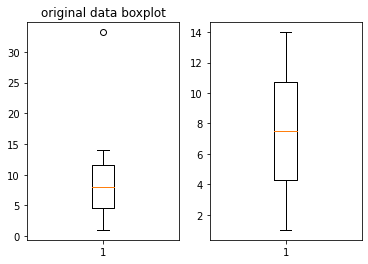

In [35]:
# 이상칯 판단 
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,33.2])
figure = plt.figure()

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

# boxplot으로 판단
ax1.set_title('original data boxplot')
ax1.boxplot(data)

#numpy로 사분위 값을 구해서 turkey fence 방식으로 이상치를 판단
first = np.percentile(data, 25)
third = np.percentile(data, 75)
IQR_value = third - first

upper_fence = third + (IQR_value * 1.5)
lower_fence = first - (IQR_value * 1.5)

# boolean indexing을 이용해서 이상치를 추출
print(data[(data > upper_fence) | (data < lower_fence)])    #[33.2]
# boolean indexing을 이용해서 이상치를 제거하고 나머지 데이터를 추출
result = data[(data <= upper_fence) & (data >= lower_fence)]
ax2.boxplot(result)
plt.show()

In [37]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,33.2])

mean = data.mean()  #9.213333333333333
std = data.std()   #7.500921424879896

zscore_data = (data-mean) / std

print(zscore_data)
# [-1.09497659 -0.96165963 -0.82834268 -0.69502572 -0.56170877 -0.42839181
#  -0.29507486 -0.1617579  -0.02844095  0.104876    0.23819296  0.37150991
#   0.50482687  0.63814382  3.19782935]

7.500921424879896
[-1.09497659 -0.96165963 -0.82834268 -0.69502572 -0.56170877 -0.42839181
 -0.29507486 -0.1617579  -0.02844095  0.104876    0.23819296  0.37150991
  0.50482687  0.63814382  3.19782935]


In [17]:
# scipy는 sklearn과 유사한 통계전용 모듈
from scipy import stats

data = np.array([-10,1,2,3,4,5,6,7,8,9,10,11,12,13,14,33.2])

zsocre_threshold = 2.0  #일반적인 기준

# print(stats.zscore(data))
# print(np.abs(stats.zscore(data)))
# np.abs는 절댓값구하는 함수

outlier = data[np.abs(stats.zscore(data))>zsocre_threshold]
print(outlier)  #[-10.   33.2]

data[np.isin(data, outlier, invert=True)]
# array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
#        14.])

[-10.   33.2]


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.])

### 온도에 따른 오존량 예측

In [44]:
# 다변수함수에 대한 수치미분 함수
def numerical_derivative(f,x):  # x = ndarray[1.0, 2.0]
                                
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # derivative_x = [0.0  0.0] 
    
    # iterator를 이용해서 입력변수 x에 대한 편미분 수행
    it = np.nditer(x,flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray[1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray[0.9999  2.0]
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx]  = tmp    # x : ndarray [1.0  2.0]
        it.iternext()
        
    return derivative_x

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

In [3]:
# data loading
df = pd.read_csv('C:/jupyter_home/data/ozone.csv')
display(df)

training_data = df[['Ozone','Temp']]

#결측치 제거
training_data.dropna(how='any', inplace=True)
display(training_data)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


<ipython-input-3-1340bf34dcfc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any', inplace=True)


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
...,...,...
147,14.0,63
148,30.0,70
150,14.0,75
151,18.0,76


In [46]:
# 이상치 처리
zsocre_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone']))>zsocre_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

In [47]:
# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

In [48]:
# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

In [49]:
# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))

W : [[0.39051088]], b:[0.84002978], loss:553.7254866912505
W : [[0.62457389]], b:[-9.81289048], loss:457.12532282130724
W : [[0.748891]], b:[-19.57145804], loss:425.3566087291619
W : [[0.86275784]], b:[-28.50970606], loss:398.7044560205871
W : [[0.96705286]], b:[-36.6965918], loss:376.344808669309
W : [[1.06258068]], b:[-44.1952759], loss:357.58633031401257
W : [[1.1500783]], b:[-51.06360959], loss:341.84902888531525
W : [[1.23022074]], b:[-57.35458105], loss:328.6463238701943
W : [[1.30362629]], b:[-63.11672419], loss:317.5700017633931
W : [[1.37086126]], b:[-68.39449312], loss:308.27759454278714


In [51]:
# 학습종료 후 예측 (Temp : 62)
predict_data = predict(np.array([[62]]))
print('온도가 62일때 오존량 : {}'.format(predict_data))  # [[16.88715564]]
                                                         # [[15.58297764]]

온도가 62일때 오존량 : [[15.58297764]]


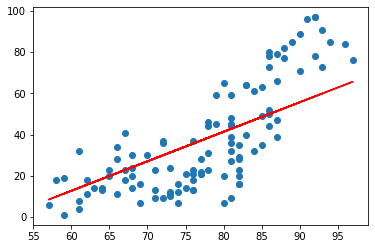

In [52]:
# 그래프로 표현해 보아요!
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel() + b, color='r')
plt.show()

### 같은 데이터로 sklearn으로 구현

In [53]:
# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[3.58411393]]   =>  [[4.51299041]]

sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


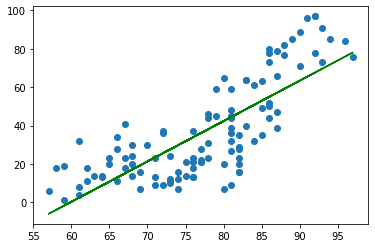

In [54]:
# 그래프 표현
plt.scatter(x_data.ravel(), t_data.ravel())
plt.plot(x_data.ravel(), 
         x_data.ravel()*model.coef_.ravel() + model.intercept_, color='g')
plt.show()

## 정규화

In [56]:
titanic = sns.load_dataset('titanic')
display(titanic.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [57]:
df = titanic[['age','fare']]
display(df.head())

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [58]:
def min_max(s):
    return(s-s.min())/(s.max()-s.min())

result = df.apply(min_max, axis=0)
display(result.head())

,age,fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [59]:
# 정규화 작업을 포함해서 모델학습 해보기
# sklearn기능을 이용해서 min-max scailing 해보기

# 데이터 결측값, 이상치 처리
df = pd.read_csv('C:/jupyter_home/data/ozone.csv')
training_data = df[['Ozone','Temp']]
training_data.dropna(how='any', inplace=True)
zsocre_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone']))>zsocre_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]


C:\Users\LG\AppData\Local\Temp\ipykernel_7308\1149772394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any', inplace=True)


In [60]:
from sklearn import linear_model  # linear regression 모델
from scipy import stats  # 이상치
from sklearn.preprocessing import MinMaxScaler  #정규화

In [61]:
# 정규화 처리하기

# 먼저 scaler 만들기
scaler_x = MinMaxScaler()  # 온도처리를 위한 scaler
scaler_t = MinMaxScaler()  # 오존량 처리를 위한 scaler

scaler_x.fit(training_data['Temp'].values.reshape(-1,1))
scaler_t.fit(training_data['Ozone'].values.reshape(-1,1))

scaled_Temp = scaler_x.transform(training_data['Temp'].values.reshape(-1,1))
scaled_Ozone = scaler_t.transform(training_data['Ozone'].values.reshape(-1,1))

training_data['Temp'] = scaled_Temp
training_data['Ozone'] = scaled_Ozone

display(training_data.head())

C:\Users\LG\AppData\Local\Temp\ipykernel_7308\2409732340.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Temp'] = scaled_Temp
C:\Users\LG\AppData\Local\Temp\ipykernel_7308\2409732340.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Ozone'] = scaled_Ozone


,Ozone,Temp
0,0.416667,0.250
1,0.364583,0.375
2,0.114583,0.425
3,0.177083,0.125
5,0.281250,0.225


In [63]:
# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# Weight, bias
W = np.random.rand(1,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    W = input_data[0].reshape(1,1)
    b = input_data[1]
    
    y = np.dot(x_data,W) + b
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-4

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))

W : [[0.79615386]], b:[0.63497725], loss:0.47357262183195226
W : [[0.60262047]], b:[0.0730274], loss:0.03240735728987765
W : [[0.66568888]], b:[0.03915227], loss:0.030689122544038522
W : [[0.71431051]], b:[0.01328687], loss:0.029672310404391757
W : [[0.75171489]], b:[-0.00661113], loss:0.029070547578872476
W : [[0.78048985]], b:[-0.02191854], loss:0.028714416407669384
W : [[0.80262626]], b:[-0.03369444], loss:0.028503653286845225
W : [[0.81965566]], b:[-0.04275357], loss:0.02837892089414427
W : [[0.83275627]], b:[-0.04972271], loss:0.02830510262020688
W : [[0.8428345]], b:[-0.05508402], loss:0.028261415992787135


In [64]:
# predict

# 아래처럼 하면 안됨! 왜냐믄 정규화한 값으로 학습을 했기때문에 온도도 정규화한 값으로 넣어야함
# result = predict([[62]])   # [[16.88715564]]   # [[52.68909775]]

predict_data = np.array([[62]])
scaled_predict_data = scaler_x.transform(predict_data)
python_result = predict(scaled_predict_data)

python_result = scaler_t.inverse_transform(python_result)

print(python_result)     # [[5.52304986]]

[[5.52304986]]


### sklearn으로 구현


In [65]:
df = pd.read_csv('./data/ozone.csv')
training_data = df[['Ozone', 'Temp']]
training_data.dropna(how='any',
                     inplace=True)   # how='any' : 결치가 존재하는 행을 삭제

# 데이터에 이상치가 있는지 확인하고 제거
zscore_threshold = 2.0
outlier = training_data['Ozone'][(np.abs(stats.zscore(training_data['Ozone'])) > zscore_threshold)]
training_data = training_data.loc[np.isin(training_data['Ozone'],outlier, invert=True)]

# 정규화는 안해도 되요! sklearn이 알아서 해줘요!

# Training Data Set
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

# model 생성
model = linear_model.LinearRegression()

# model 학습
model.fit(x_data, t_data)

# 예측
result = model.predict(np.array([[62]]))
print('sklearn으로 구한 온도가 62도 일때의 오존량 : {}'.format(result))  
# [[4.51299041]]

sklearn으로 구한 온도가 62도 일때의 오존량 : [[4.51299041]]


C:\Users\LG\AppData\Local\Temp\ipykernel_7308\1244476541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.dropna(how='any',


In [66]:
# 변수 삭제하기 
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## 다중 선형 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model  # linear regression 모델
from scipy import stats  # 이상치
from sklearn.preprocessing import MinMaxScaler  #정규화

In [2]:
# 다변수함수에 대한 수치미분 함수
def numerical_derivative(f,x):  # x = ndarray[1.0, 2.0]
                                
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # derivative_x = [0.0  0.0] 
    
    # iterator를 이용해서 입력변수 x에 대한 편미분 수행
    it = np.nditer(x,flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray[1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray[0.9999  2.0]
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx]  = tmp    # x : ndarray [1.0  2.0]
        it.iternext()
        
    return derivative_x

In [3]:
#data loading
df = pd.read_csv('./data/student_exam_score.csv')
display(df.head())

,quiz1,quiz2,quiz3,exam
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [4]:
# 결측치, 이상치X , 각 변수의 scale이 비슷하기 때문에 정규화도 패스

#training data
x_data = df.drop('exam',axis=1, inplace=False)
t_data = df.iloc[:,-1].values.reshape(-1,1)

# weight, bias
W = np.random.rand(3,1)
b = np.random.rand(1)

# loss function
def loss_func(input_data):
    input_W = input_data[:-1].reshape(-1,1)
    input_b = input_data[-1]
    
    y = np.dot(x_data,input_W) + input_b
    
    return np.mean(np.power(t_data-y,2))

# predict
def predict(x):
    y = np.dot(x,W) + b
    return y

# learning_rate
learning_rate = 1e-5

# 반복 학습
for step in range(300000):
    
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)  # [w1 w2 w3 b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)

    W = W - derivative_result[:-1].reshape(-1,1)
    b = b - derivative_result[-1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b:{}, loss:{}'.format(W, b, loss_func(input_param)))

W : [[0.4598257 ]
 [0.60128853]
 [0.78133751]], b:[0.91378951], loss:191.52401616230406
W : [[0.35607503]
 [0.52790216]
 [1.11907182]], b:[0.85630449], loss:6.257698857417589
W : [[0.35599306]
 [0.52811255]
 [1.11966502]], b:[0.79658154], loss:6.245807859776282
W : [[0.35599238]
 [0.52827828]
 [1.1202146 ]], b:[0.73754507], loss:6.234188951218652
W : [[0.35599176]
 [0.52844207]
 [1.12075784]], b:[0.67918764], loss:6.222835788420699
W : [[0.35599114]
 [0.52860398]
 [1.12129483]], b:[0.62150144], loss:6.211742293289176
W : [[0.35599053]
 [0.52876403]
 [1.12182564]], b:[0.56447875], loss:6.200902526748108
W : [[0.35598993]
 [0.52892224]
 [1.12235035]], b:[0.50811194], loss:6.1903106855589645
W : [[0.35598934]
 [0.52907863]
 [1.12286902]], b:[0.45239347], loss:6.1799610992141005
W : [[0.35598875]
 [0.52923322]
 [1.12338173]], b:[0.39731587], loss:6.169848226900624


In [5]:
# predict
result = predict(np.array([[89, 100, 95]]))
print(result)   # [[191.77512112]]

[[191.73383247]]


In [6]:
# sklearn 구현
from sklearn import linear_model

model = linear_model.LinearRegression()

model.fit(x_data, t_data)

result_sklearn = model.predict(np.array([[89, 100, 95]]))
print(result_sklearn)   # [[192.50147537]]

[[192.50147537]]
